## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Aluno : André da Cunha Melo Tolentino

## Resumo :

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [ ]:
import warnings
warnings.simplefilter("once")

!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.25.3
Usando seaborn 0.9.0
Usando scipy 1.3.2
Usando yellowbrick 1.0.1
Usando numpy 1.18.1


/opt/anaconda3/envs/ambiente_virtual/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [3]:
# solução
enem = pd.read_csv('input/MICRODADOS_ENEM_2017.CSV', sep=';', encoding='iso-8859-1', usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])

In [4]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [5]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [6]:
# solução
df_dicionario = pd.read_xls('input/DICIONARIO/Dicionário_Microdados_Enem_2017.xls')

AttributeError: module 'pandas' has no attribute 'read_xls'

In [7]:
# solução
df_dicionario = pd.read_excel('input/DICIONARIO/Dicion†rio_Microdados_Enem_2017.xlsx')

In [8]:
df_dicionario.head(40)

,DICIONÁRIO DE VARIÁVEIS - ENEM 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica
5,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica
6,CO_MUNICIPIO_RESIDENCIA,Código do município de residência,NaN,NaN,7,Numérica
7,NaN,1º dígito: Região,NaN,NaN,NaN,NaN
8,NaN,1º e 2º dígitos: UF,NaN,NaN,NaN,NaN
9,NaN,"3º, 4º, 5º e 6º dígitos: Município",NaN,NaN,NaN,NaN


In [9]:
# A Coluna 1 é a que possui a abrevição do texto. A coluna 2 é a que possui a Descrição Integral

In [10]:
# Colunas Dataset
lista_colunas_abreviadas = enem.columns
# Buscando descrição da variável para criar dicionário
todas_as_notas_dicionario = {}
for coluna in lista_colunas_abreviadas:
    selecao = df_dicionario['DICIONÁRIO DE VARIÁVEIS - ENEM 2017'] == coluna
    todas_as_notas_dicionario[coluna] = df_dicionario[selecao].iloc[0,1]
    
todas_as_notas_dicionario

{'NU_NOTA_CN': 'Nota da prova de Ciências da Natureza',
 'NU_NOTA_CH': 'Nota da prova de Ciências Humanas',
 'NU_NOTA_LC': 'Nota da prova de Linguagens e Códigos',
 'NU_NOTA_MT': 'Nota da prova de Matemática',
 'NU_NOTA_COMP1': 'Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.',
 'NU_NOTA_COMP2': 'Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.',
 'NU_NOTA_COMP3': 'Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.',
 'NU_NOTA_COMP4': 'Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.',
 'NU_NOTA_COMP5': 'Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos huma

In [11]:
# Colunas Dataset
lista_colunas_abreviadas = enem.columns
# Buscando descrição da variável para criar lista
todas_as_notas = []
for coluna in lista_colunas_abreviadas:
    selecao = df_dicionario['DICIONÁRIO DE VARIÁVEIS - ENEM 2017'] == coluna
    todas_as_notas.append(df_dicionario[selecao].iloc[0,1])
    
todas_as_notas

['Nota da prova de Ciências da Natureza',
 'Nota da prova de Ciências Humanas',
 'Nota da prova de Linguagens e Códigos',
 'Nota da prova de Matemática',
 'Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.',
 'Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.',
 'Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.',
 'Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.',
 'Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.']

In [12]:
enem[todas_as_notas].head()

KeyError: "None of [Index(['Nota da prova de Ciências da Natureza',\n       'Nota da prova de Ciências Humanas',\n       'Nota da prova de Linguagens e Códigos', 'Nota da prova de Matemática',\n       'Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.',\n       'Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.',\n       'Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.',\n       'Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.',\n       'Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.'],\n      dtype='object')] are in the [columns]"

## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [13]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [14]:
# Número total de linhas
print(f'Banco de dados com {enem.shape[0]} linhas')
# Eliminando linhas nulas
enem = enem.dropna()
print(f'Banco de dados com {enem.shape[0]} linhas não nulas')

Banco de dados com 6731341 linhas
Banco de dados com 4426755 linhas não nulas


In [15]:
# Imprimindo as 5 primeiras notas de Matemática
enem.sort_values(by = 'NU_NOTA_MT', ascending = False)['NU_NOTA_MT'][0:5]

6482550   993.900
5450276   993.900
6240853   993.900
2463230   993.900
6020334   993.900
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [16]:
# solução e impressão
enem['nota_total'] = enem['NU_NOTA_CN'] + enem['NU_NOTA_CH'] + enem['NU_NOTA_LC'] + enem['NU_NOTA_MT'] + enem['NU_NOTA_COMP1'] + enem['NU_NOTA_COMP2'] + enem['NU_NOTA_COMP3'] + enem['NU_NOTA_COMP4'] + enem['NU_NOTA_COMP5']

/opt/anaconda3/envs/ambiente_virtual/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


In [18]:
# Imprimindo as 5 primeiras notas totais
enem.sort_values(by = 'nota_total', ascending = False)['nota_total'][0:5]

668515    4276.200
2973525   4257.600
4372653   4220.600
1370537   4211.500
167096    4209.900
Name: nota_total, dtype: float64

Text(0, 0.5, 'Notas')

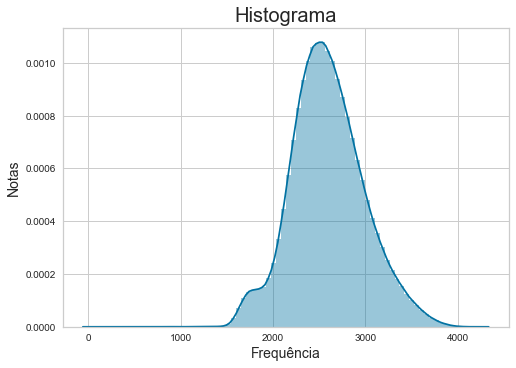

In [19]:
# solução histograma e descrição

ax = sns.distplot(enem['nota_total'], bins = 80, norm_hist=False)
ax.set_title('Histograma', fontsize=20)
ax.set_xlabel('Frequência', fontsize=14)
ax.set_ylabel('Notas', fontsize=14)


In [20]:
# Média , Mediana e Desvio Padrão
media = enem['nota_total'].mean()
mediana = enem['nota_total'].median()
desvio_padrao = enem['nota_total'].std()
lista_desc_populacao = [media, mediana, desvio_padrao]

print(f'Observando as notas totais dos alunos, temos a média igual a {media :.3f}, mediana igual a {mediana :.3f}, desvio padrão igual a {desvio_padrao :.3f}')

Observando as notas totais dos alunos, temos a média igual a 2592.747, mediana igual a 2569.300, desvio padrão igual a 395.990


## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

In [21]:
from random import sample

In [22]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    SEED = 745
    # 1% de sample em enem_eda
    porcento_1 = round(enem.shape[0]*0.01, 0)
    enem_eda = enem.sample(n = int(porcento_1), random_state = SEED)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    media = enem_eda['nota_total'].mean()
    mediana = enem_eda['nota_total'].median()
    desvio_padrao = enem_eda['nota_total'].std()
    lista_desc_subconjunto_1 = [media, mediana, desvio_padrao]
    print(f'Observando o subcojunto, temos a média igual a {media :.3f}, mediana igual a {mediana :.3f}, desvio padrão igual a {desvio_padrao :.3f}')
    # plote o histograma da nota_total e mostre com plt.show()
    plt.hist(enem_eda['nota_total'], density=True, bins = 80)
    plt.ylabel('Densidade', fontsize = 14)
    plt.xlabel('Notas', fontsize = 14)
    plt.title('Histograma Amostra 1%', fontsize = 20)
    plt.show()
    return enem_eda


Enem EDA sampling tem a distribuição
Observando o subcojunto, temos a média igual a 2594.186, mediana igual a 2572.800, desvio padrão igual a 396.483


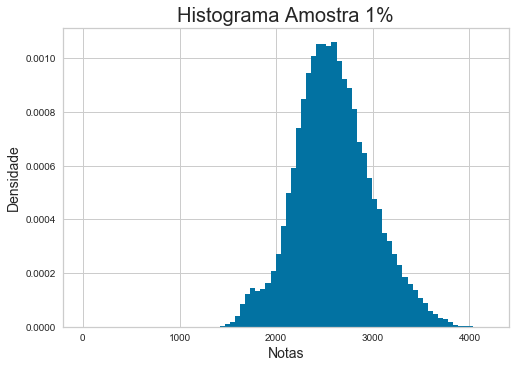

In [23]:
enem_eda = eda_sample(enem)

In [24]:
# Comparando resultados

media = enem_eda['nota_total'].mean()
mediana = enem_eda['nota_total'].median()
desvio_padrao = enem_eda['nota_total'].std()
lista_desc_subconjunto_1 = [media, mediana, desvio_padrao]

df_resultados_1 = pd.DataFrame([lista_desc_subconjunto_1, lista_desc_populacao], index = ['Subconjunto', 'População'],
                               columns = ['Média', 'Mediana', 'Desvio Padrão'])
df_resultados_1

,Média,Mediana,Desvio Padrão
Subconjunto,2594.186,2572.800,396.483
População,2592.747,2569.300,395.990


### Pergunta: A média, mediana e desvio padrão do subconjunto parecem representar a população?

Sabemos que o teorema do limite central é valido para conjuntos com n>= 30. Na situação analisada, temos um n muito elevado, o que atende essa condição. Logo, poderíamos até mesmo calcular o intervalo de confiaça para o erro nível inferencial da nossa amostra. Para um nível de confiança de 99%, teríamos que a nossa média estaria no intervalo entre () e (). Ou seja, muito próximo da população.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [25]:
# solução
todas_as_notas.append()

TypeError: append() takes exactly one argument (0 given)

In [26]:
correlacoes = enem.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


In [27]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [28]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes[9:10]
correlacao_com_nota_total

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


In [29]:
print(correlacao_com_nota_total)

            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_COMP1  \
nota_total       0.733       0.794       0.776       0.760          0.726   

            NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
nota_total          0.693          0.773          0.761          0.677   

            nota_total  
nota_total       1.000  


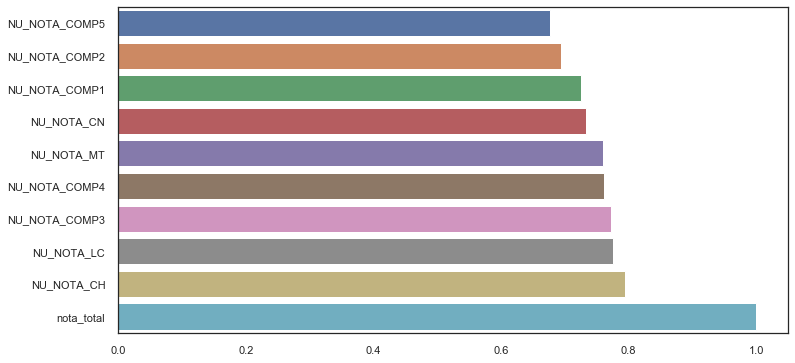

In [30]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = enem.corr()["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [66]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    np.random.seed(seed=SEED)
    # train_test_split
    colunas = list(dados.columns)
    colunas.remove('nota_total')
    X = dados[colunas]
    y = dados['nota_total']
    train_x, test_x, train_y, test_y =train_test_split(X, y, test_size=0.2)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("*" * 80)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("*" * 80)
    print("Desvio padrão do conjunto de testes", round(test_y.std(), 3))
    return train_x, test_x, train_y, test_y

In [67]:
# Código pronto

interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [69]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    modelo = LinearRegression()
    modelo.fit(train_x, train_y)
    # calcule o r2_score com os dados de teste
    test_pred = modelo.predict(test_x)
    r2_score = metrics.r2_score(test_y, test_pred).round(2)
    # calcule a predição e os dois tipos de erros
    mse = metrics.mean_squared_error(test_y, test_pred).round(2)
    mae = metrics.mean_absolute_error(test_y, test_pred).round(2)
    print("*" * 80)
    print("R2 score", r2_score)
    print("MSE", mse)
    print("MAE", mae)
    
    return modelo

In [70]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
R2 score 0.77
MSE 36422.29
MAE 141.98


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    Coloque sua opinião aqui

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

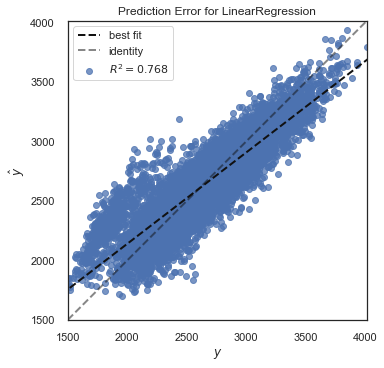

In [49]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

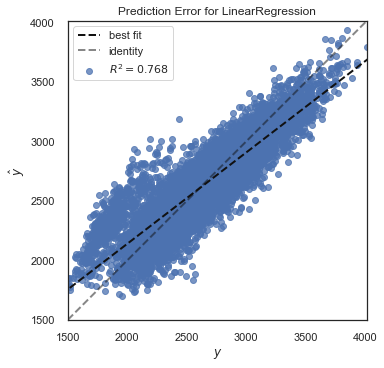

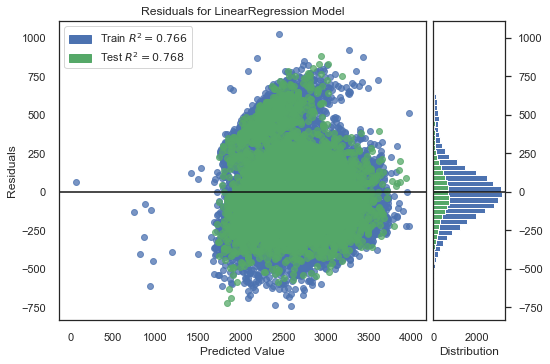

In [50]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [51]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 9) (35414,) (8854, 9) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 1.0
MSE 0.0
MAE 0.0


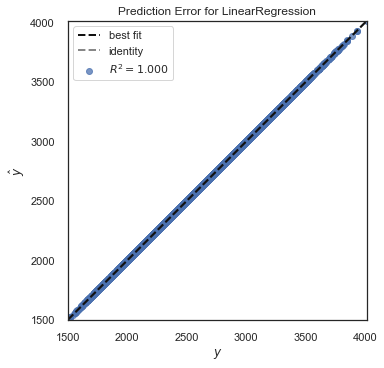

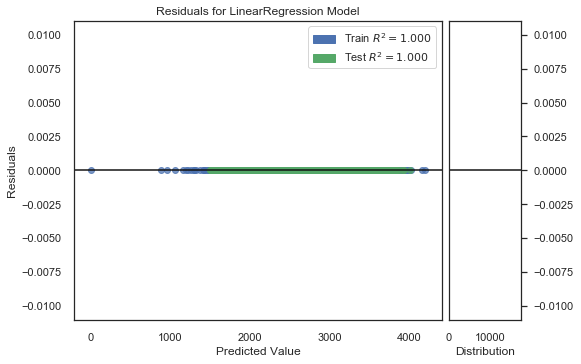

In [71]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(todos)

In [72]:
enem_eda.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'],
      dtype='object')

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 8) (35414,) (8854, 8) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.96
MSE 6483.84
MAE 64.75


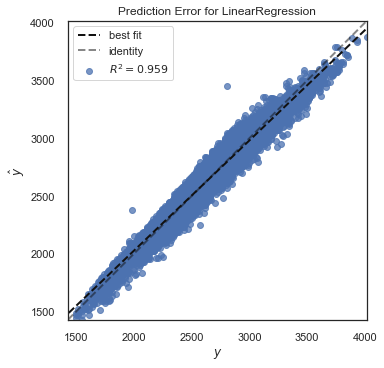

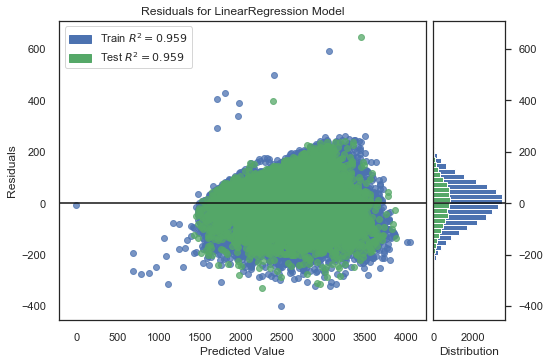

In [75]:
# solução 2: Removendo a nota de Matemátima


regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 4) (35414,) (8854, 4) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.85
MSE 24179.75
MAE 109.36


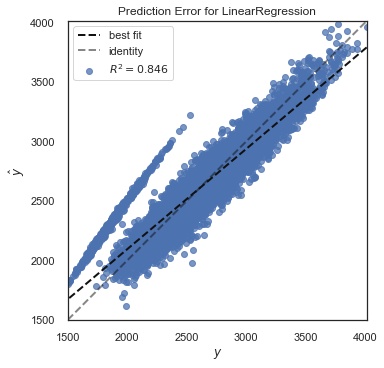

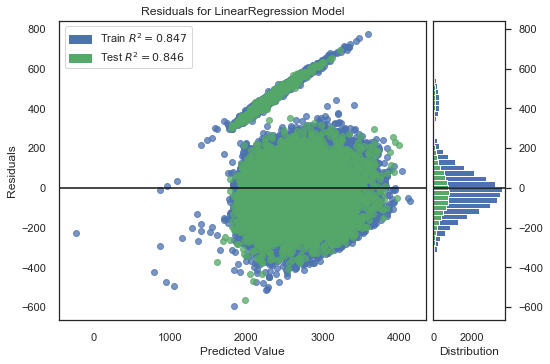

In [76]:
# solução 3: Removendo todas as notas de Redação


regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT',
       'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_MT'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.72
MSE 43812.26
MAE 157.26


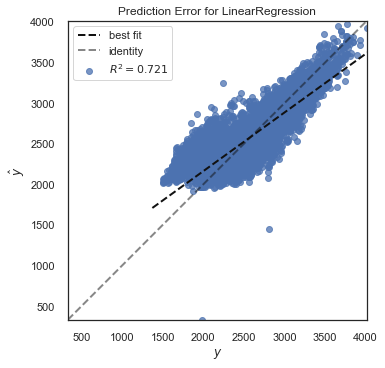

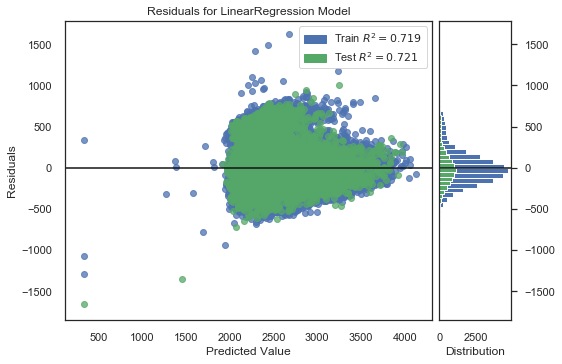

In [77]:
# solução 4: Apenas notas de Matemática e Ciências Naturais


regressao_completa_para(['NU_NOTA_CN','NU_NOTA_MT',
       'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.72
MSE 44337.28
MAE 159.59


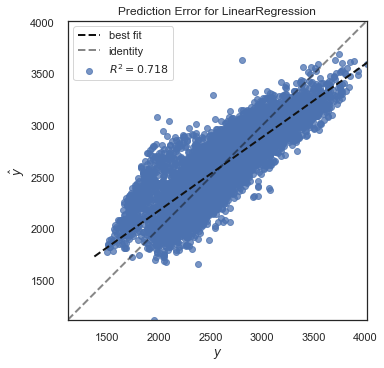

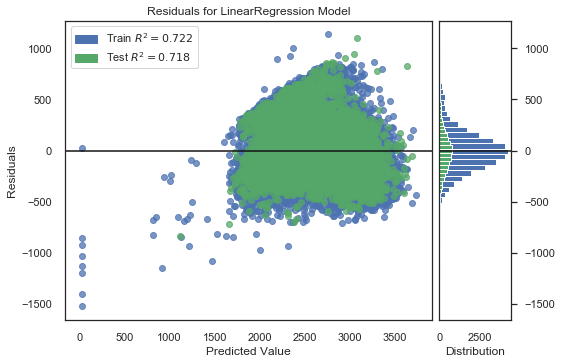

In [78]:
# solução 5: Apenas notas de Ciências Humanas e Liguagens e Códigos


regressao_completa_para(['NU_NOTA_CH', 'NU_NOTA_LC',
       'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 5) (35414,) (8854, 5) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.67
MSE 51832.99
MAE 183.67


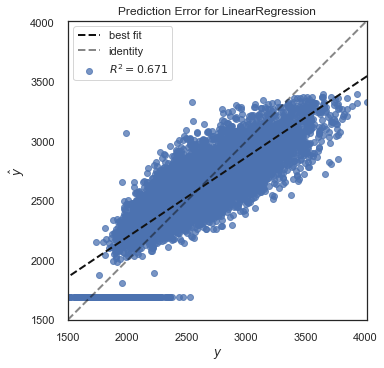

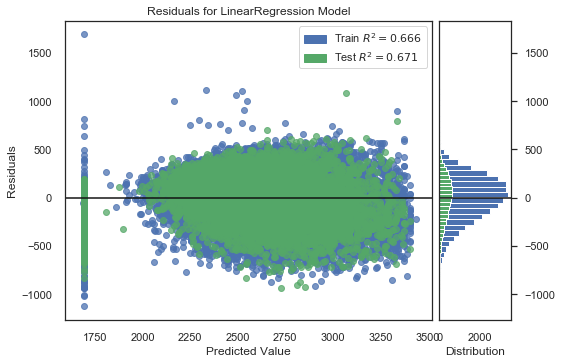

In [81]:
# solução 6: Apenas nota da Redação

regressao_completa_para(['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 1) (35414,) (8854, 1) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_CN'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.53
MSE 73459.29
MAE 210.46


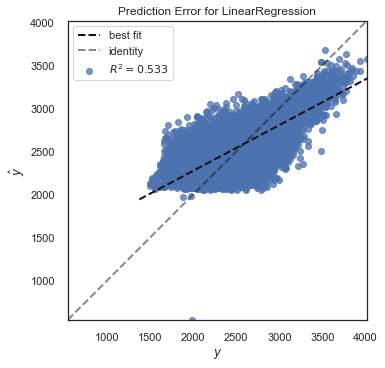

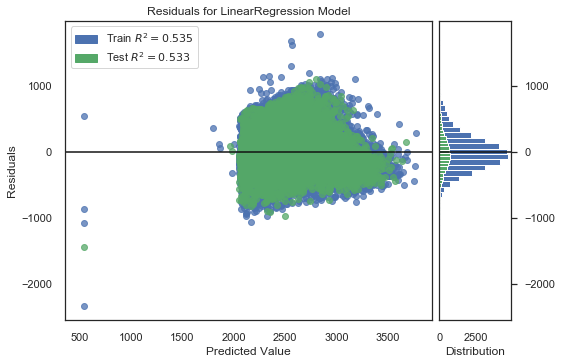

In [80]:
# solução 7: Apenas Ciências Naturais


regressao_completa_para(['NU_NOTA_CN',
       'nota_total'])

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647
********************************************************************************
R2 score 0.92
MSE 11847.2
MAE 86.62


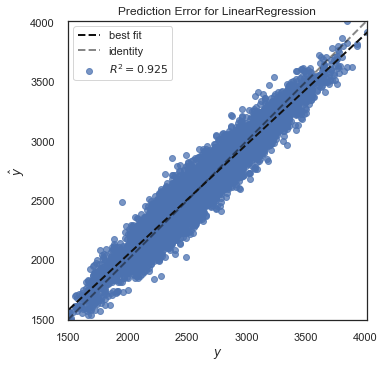

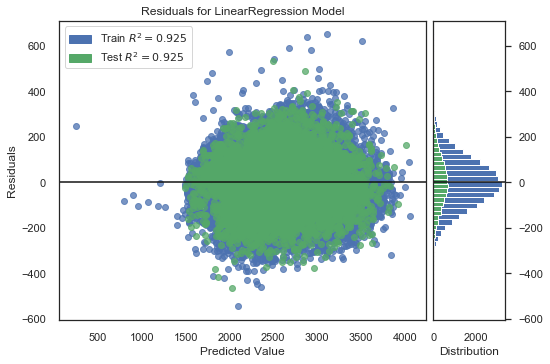

In [82]:
# solução


regressao_completa_para(['NU_NOTA_LC', 'NU_NOTA_COMP3','NU_NOTA_MT',
       'nota_total'])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [198]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    modelos = []
    molelo_regressao = LinearRegression()
    modelos.append(molelo_regressao)
    modelo_lasso = Lasso()
    modelos.append(modelo_lasso)
    modelo_ridge = Ridge()
    modelos.append(modelo_ridge)
    modelo_decisiontree = DecisionTreeRegressor()
    modelos.append(modelo_decisiontree)
    modelo_randomforest = RandomForestRegressor()
    modelos.append(modelo_randomforest)
    return modelos

In [199]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [144]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    dados_filtrados = dados[colunas]
    # faça o split
    train_x, test_x, train_y, test_y = split(dados_filtrados)
    # plote o histograma de train_y
    plt.hist(train_y, density=True, bins = 80)
    plt.ylabel('Densidade', fontsize = 14)
    plt.xlabel('Notas', fontsize = 14)
    plt.title('Histograma Amostra 1%', fontsize = 20)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [146]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
    # calcule o mse
    mse = metrics.mean_squared_error(test_y, test_pred).round(2)
    # calcule o mae
    mae = metrics.mean_absolute_error(test_y, test_pred).round(2)    

    return mse, mae, tempo_de_treino

In [207]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        scaler = StandardScaler()
        pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])
        'pipe = make_pipeline([scaler, modelo])'
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipeline, train_x, test_x, train_y, test_y)
        resultados.append([modelo, pipeline, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipeline", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
********************************************************************************
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
********************************************************************************
Desvio padrão do conjunto de testes 396.647


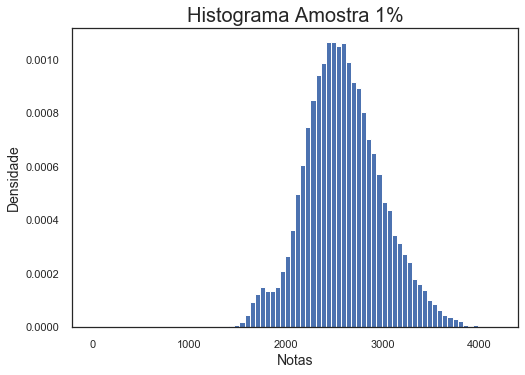

(35414,)
(35414,)
(35414,)
(35414,)
(35414,)


,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11847.200,86.620,0.006
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11844.630,86.650,0.006
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11847.170,86.620,0.005
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22589.700,118.860,0.145
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13126.520,90.610,7.225


In [208]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

Text(0, 0.5, 'Notas')

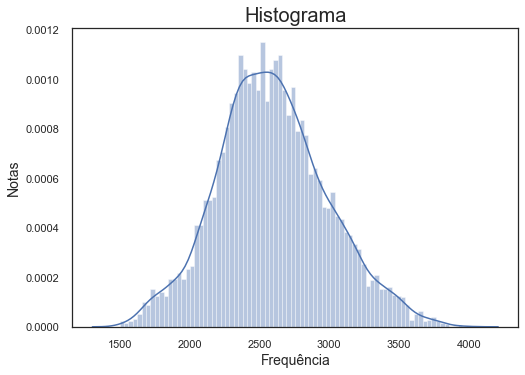

In [210]:
# solução: histograma


ax = sns.distplot(test_y, bins = 80, norm_hist=False)
ax.set_title('Histograma', fontsize=20)
ax.set_xlabel('Frequência', fontsize=14)
ax.set_ylabel('Notas', fontsize=14)


## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [334]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = np.quantile(serie, p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    lista = [0 if valor < quant else 1 for valor in serie]
    new_index = serie.index.values
    y = pd.Series(lista, index = new_index) 
    return y

In [335]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [336]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [223]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2838.325


0.25005647165123107

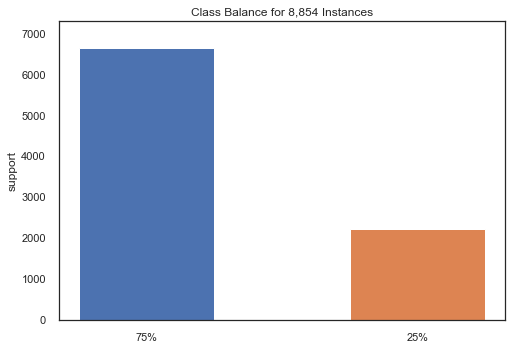

In [224]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

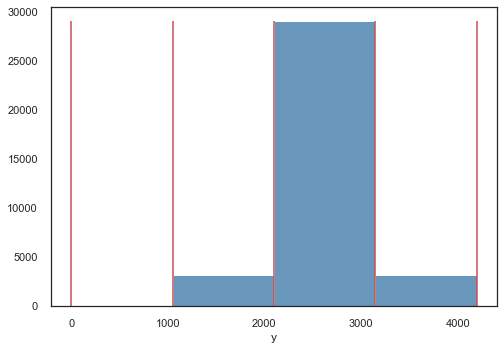

In [225]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [226]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [233]:
# solução

def gera_classificadores():
    modelos = []
    modelo_dummy = DummyClassifier(strategy='most_frequent')
    modelos.append(modelo_dummy)
    modelo_logistic = LogisticRegression()
    modelos.append(modelo_logistic)
    modelo_ridge = RidgeClassifier()
    modelos.append(modelo_ridge)
    modelo_tree = DecisionTreeClassifier()
    modelos.append(modelo_tree)
    modelo_ensemble = RandomForestClassifier(n_estimators=10)
    modelos.append(modelo_ensemble)
    modelo_svc = SVC()
    modelos.append(modelo_svc)
    
    return modelos

In [234]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [343]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(seed=SEED)
    
    # defina X como todas as colunas de `dados` exceto top_p
    
    colunas = list(dados.columns)
    colunas.remove('top_p')
    X = dados[colunas]
    
    # defina y como somente a coluna top_p
    
    y = dados['top_p']
    
    # quebre em treino e teste, usando estratificação baseada em y
    
    train_x, test_x, train_y, test_y =train_test_split(X, y, test_size=0.2)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", round(test_y.mean(),3))
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [394]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse = interesse.copy()
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]


train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.248


## Pergunta: implemente o treino e o teste do classificador

In [395]:
from sklearn.metrics import accuracy_score

In [396]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    predict_y = pipe.predict(test_x)
    acuracia = accuracy_score(test_y, predict_y)
    print("Resultado", nome, acuracia)

    return acuracia, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [399]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]# selecione somente as colunas especificas de dados
    interesse = interesse.copy()
    nota_total = dados['nota_total'] # somente a coluna nota_total
    interesse['top_p'] = top_p(nota_total, p)# defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.248


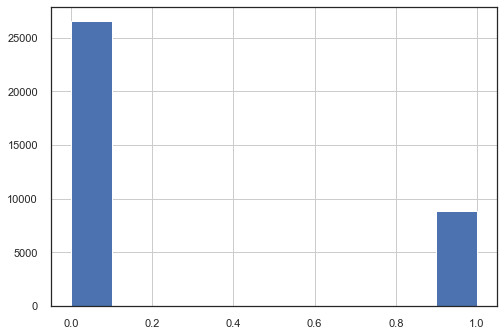

In [400]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [401]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        acuracia, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, acuracia])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.248


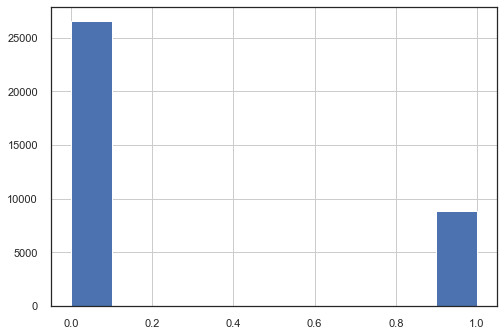

Resultado DummyClassifier 0.7523153377004743
Resultado LogisticRegression 0.9382200135531963
Resultado RidgeClassifier 0.9295233792636096
Resultado DecisionTreeClassifier 0.9126948271967472
Resultado RandomForestClassifier 0.9269256833069799
Resultado SVC 0.9398012197876666


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.752,0.006
LogisticRegression,0.938,0.047
RidgeClassifier,0.930,0.021
DecisionTreeClassifier,0.913,0.072
RandomForestClassifier,0.927,0.252
SVC,0.940,7.252


In [402]:
# solução top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2


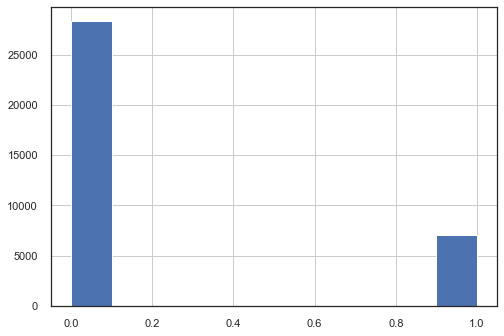

Resultado DummyClassifier 0.7996385814321211
Resultado LogisticRegression 0.946916647842783
Resultado RidgeClassifier 0.9321210752202395
Resultado DecisionTreeClassifier 0.9220691213011069
Resultado RandomForestClassifier 0.9390106166704314
Resultado SVC 0.948384910774791


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.009
LogisticRegression,0.947,0.056
RidgeClassifier,0.932,0.019
DecisionTreeClassifier,0.922,0.072
RandomForestClassifier,0.939,0.236
SVC,0.948,5.078


In [403]:
# solução top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.80)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.102


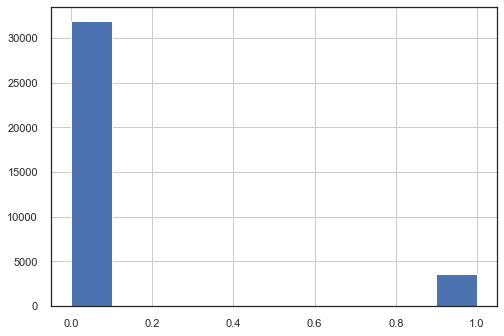

Resultado DummyClassifier 0.8975604246668173
Resultado LogisticRegression 0.9711994578721482
Resultado RidgeClassifier 0.9253444770725096
Resultado DecisionTreeClassifier 0.9564038852496047
Resultado RandomForestClassifier 0.9646487463293427
Resultado SVC 0.9717641743844591


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.898,0.005
LogisticRegression,0.971,0.058
RidgeClassifier,0.925,0.021
DecisionTreeClassifier,0.956,0.058
RandomForestClassifier,0.965,0.252
SVC,0.972,2.993


In [405]:
# solução top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.90)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.051


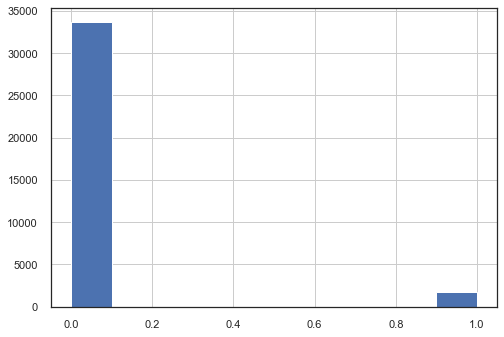

Resultado DummyClassifier 0.9488366839846397
Resultado LogisticRegression 0.9821549582109781
Resultado RidgeClassifier 0.9488366839846397
Resultado DecisionTreeClassifier 0.9726677208041563
Resultado RandomForestClassifier 0.9791054890444997
Resultado SVC 0.9815902416986673


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.949,0.005
LogisticRegression,0.982,0.057
RidgeClassifier,0.949,0.016
DecisionTreeClassifier,0.973,0.057
RandomForestClassifier,0.979,0.223
SVC,0.982,2.708


In [408]:
# solução top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.009


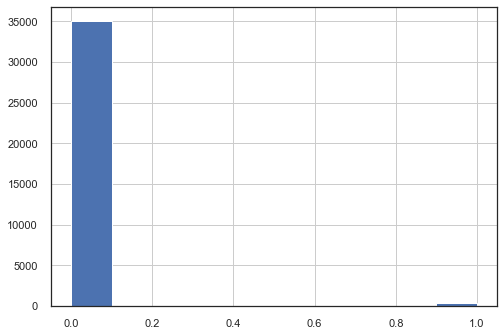

Resultado DummyClassifier 0.9909645358030269
Resultado LogisticRegression 0.9952563812965891
Resultado RidgeClassifier 0.9909645358030269
Resultado DecisionTreeClassifier 0.9911904224079512
Resultado RandomForestClassifier 0.9941269482719675
Resultado SVC 0.994465778179354


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.991,0.006
LogisticRegression,0.995,0.059
RidgeClassifier,0.991,0.016
DecisionTreeClassifier,0.991,0.049
RandomForestClassifier,0.994,0.184
SVC,0.994,0.698


In [409]:
# solução top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.747


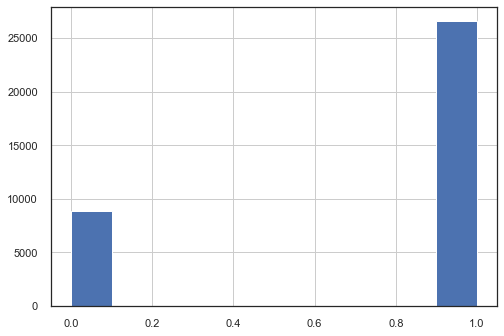

Resultado DummyClassifier 0.7473458323921391
Resultado LogisticRegression 0.9178902191100068
Resultado RidgeClassifier 0.9059182290490174
Resultado DecisionTreeClassifier 0.8887508470747685
Resultado RandomForestClassifier 0.8984639710865145
Resultado SVC 0.9203749717641744


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.747,0.006
LogisticRegression,0.918,0.048
RidgeClassifier,0.906,0.021
DecisionTreeClassifier,0.889,0.073
RandomForestClassifier,0.898,0.322
SVC,0.920,9.144


In [410]:
# solução bottom 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta para os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

In [ ]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [411]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9178902191100068


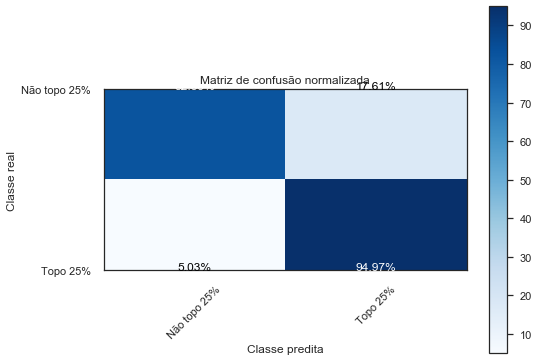

In [412]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9203749717641744


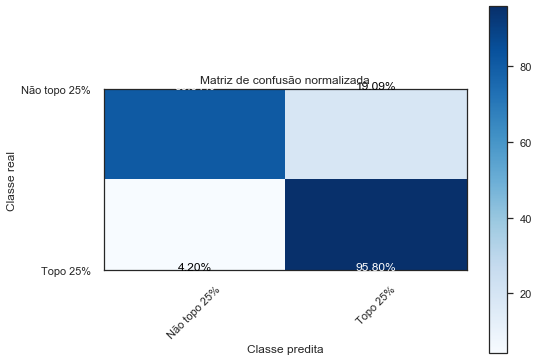

In [413]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [414]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [416]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados # selecione as 3
    
    y = top_p(dados['nota_total', 0.75])# calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [ ]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    
    scores = # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

In [ ]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [ ]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = # some por coluna
        y_pred_true_false = # compare a soma parcial com o self.top25_quantile
        y_pred = # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

In [ ]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    Sua solução aqui

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Sua solução aqui

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Sua solução aqui

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!